# Using Regression Analysis to Test Hypothesis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing & Slicing

In [3]:
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"

df_mbs_sa3_service_1_np = pd.read_pickle(
    os.path.join(
        path, "clean_datasets/2014-22_combined_service_1_categories_no_pivot.pkl"
    )
)
df_mbs_sa3_service_1_np.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103592 entries, 0 to 229389
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            103592 non-null  int64  
 1   StateTerritory                  103592 non-null  object 
 2   GeographicCode                  103592 non-null  object 
 3   GeographicAreaName              103592 non-null  object 
 4   GeographicGroup                 103592 non-null  object 
 5   ServiceLevel                    103592 non-null  object 
 6   Service                         103592 non-null  object 
 7   DemographicGroup                103592 non-null  object 
 8   MBS_per_100                     103592 non-null  float64
 9   No_of_patients                  103592 non-null  Int32  
 10  No_of_services                  103592 non-null  Int64  
 11  %_People_had_service            103592 non-null  float64
 12  Services_100_peo

In [6]:
df_mbs_sa3_service_1_np.shape

(103592, 52)

In [4]:
df_mbs_sa3_service_1_np["Population_demographic"].unique()

array(['0-24', '25-44', '45-64', '65+', 'All persons', 'Females', 'Males'],
      dtype=object)

In [75]:
# Calculating medicare rebate per person per year
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] == 0, "MBS_per_person"
] = 0
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] != 0, "MBS_per_person"
] = (
    df_mbs_sa3_service_1_np["Total_mbs_paid_$"]
    / df_mbs_sa3_service_1_np["No_of_patients"]
)

### Extracting All Person Dataset

In [76]:
df_mbs_sa3_all_person = df_mbs_sa3_service_1_np[
    df_mbs_sa3_service_1_np["Population_demographic"] == "All persons"
]
df_mbs_sa3_all_person.shape

(14860, 53)

In [77]:
# checking for any misisng values
df_mbs_sa3_all_person.isnull().sum()

Year                              0
StateTerritory                    0
GeographicCode                    0
GeographicAreaName                0
GeographicGroup                   0
ServiceLevel                      0
Service                           0
DemographicGroup                  0
MBS_per_100                       0
No_of_patients                    0
No_of_services                    0
%_People_had_service              0
Services_100_people               0
Total_mbs_paid_$                  0
Total_provider_fees_$             0
ERP                               0
key_x                             0
Out_of_Pocket                     0
Out_of_pocket_cost_%              0
Out_of_pocket_cost_per_person     0
No_of_service_per_person          0
Out_of_pocket_cost_per_service    0
Patient_ERP_Flag                  0
negative_income                   0
no_income_or_not_applicable       0
average_income_$5200              0
average_income_$13000             0
average_income_$18200       

## Hypothesis 1:

If percentage of people who the service increases, no of services per person also increases

<Axes: xlabel='%_People_had_service', ylabel='Count'>

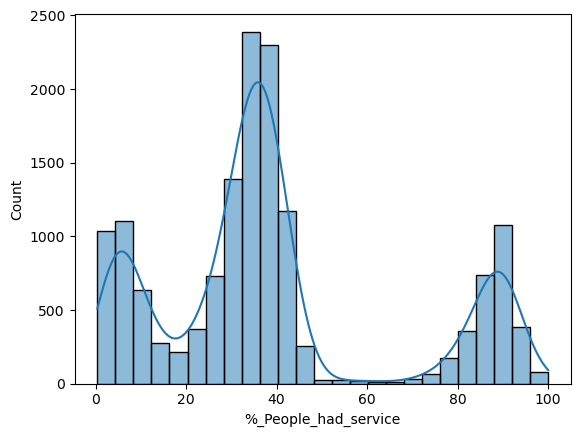

In [12]:
sns.histplot(df_mbs_sa3_all_person["%_People_had_service"], kde=True, bins=25)

In [13]:
# checking on mean, median and max
print(df_mbs_sa3_all_person["%_People_had_service"].mean())
print(df_mbs_sa3_all_person["%_People_had_service"].median())
print(df_mbs_sa3_all_person["%_People_had_service"].max())

39.2777126514132
35.17
100.0


<Axes: xlabel='No_of_service_per_person', ylabel='Count'>

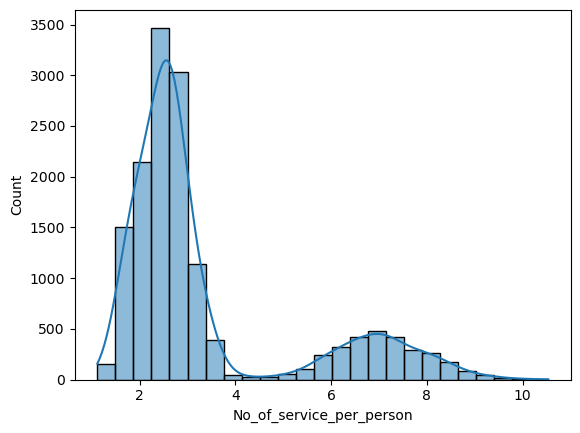

In [17]:
sns.histplot(df_mbs_sa3_all_person["No_of_service_per_person"], kde=True, bins=25)

In [18]:
# checking on mean, median and max on OOP per person
print(df_mbs_sa3_all_person["No_of_service_per_person"].mean())
print(df_mbs_sa3_all_person["No_of_service_per_person"].median())
print(df_mbs_sa3_all_person["No_of_service_per_person"].max())

3.379723803247172
2.6375843312539313
10.533532461677186


### Data Preparation for Regression Analysis

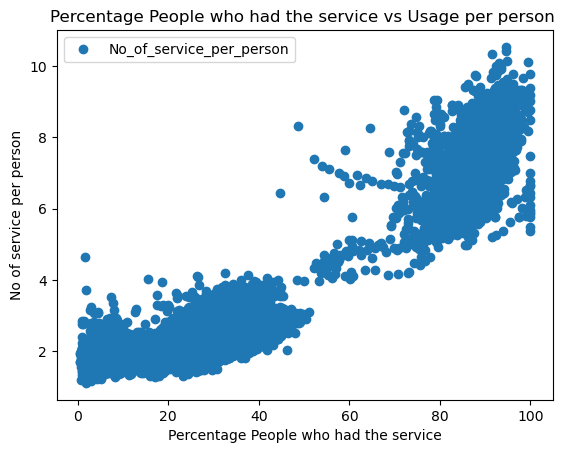

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_mbs_sa3_all_person.plot(
    x="%_People_had_service", y="No_of_service_per_person", style="o"
)  # The style option creates a scatterplot; without it, we only have lines.
plt.title("Percentage People who had the service vs Usage per person ")
plt.xlabel("Percentage People who had the service")
plt.ylabel("No of service per person")
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_mbs_sa3_all_person["%_People_had_service"].values.reshape(-1, 1)
y = df_mbs_sa3_all_person["No_of_service_per_person"].values.reshape(-1, 1)

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [22]:
# Create a regression object.

regression = (
    LinearRegression()
)  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

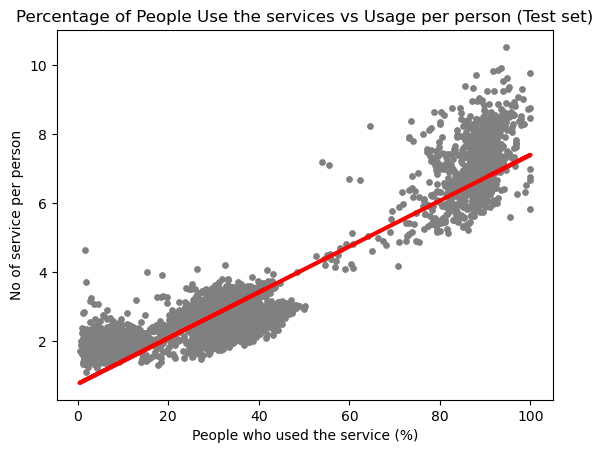

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s=15)
plot_test.plot(X_test, y_predicted, color="red", linewidth=3)
plot_test.title("Percentage of People Use the services vs Usage per person (Test set)")
plot_test.xlabel("People who used the service (%)")
plot_test.ylabel("No of service per person")
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)  # This is the mean squared error
r2 = r2_score(y_test, y_predicted)  # This is the R2 score.

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.0663712]]
Mean squared error:  0.5631899452941482
R2 score:  0.8468097503925729


In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.752439,3.511889
1,1.583333,0.945315
2,8.720205,7.365401
3,3.218343,3.186670
4,6.615794,6.600805
5,8.295788,7.308985
6,6.207076,6.384435
7,2.830751,3.414987
8,2.595812,3.449500
9,2.659852,3.065211


### Compare how regression fits the test dataset

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train)  # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.0663712]]
Mean squared error:  0.5481400892234184
R2 score:  0.8526878719199904


### Conclusion:

The model is a reasonably good fit to predict number of services per person using percentage of people using the service in the areas. There is a strong relation between these two variables. Possible reasons :

1. Where there is higher percentage of population using the service, there is easy access to services
2. Where there is higher percentage of population using the service, there is presece of demographics that have high usage of services

## Hypothesis 2:

If percentage of people who the service increases, out of pocket per person decreases

In [ ]:
# checking on mean, median and max
print(df_mbs_sa3_all_person["%_People_had_service"].mean())
print(df_mbs_sa3_all_person["%_People_had_service"].median())
print(df_mbs_sa3_all_person["%_People_had_service"].max())

39.2777126514132
35.17
100.0


<Axes: xlabel='Out_of_pocket_cost_per_person', ylabel='Count'>

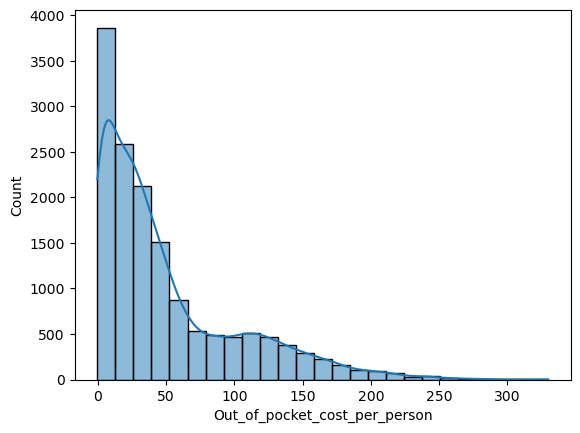

In [34]:
sns.histplot(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"], kde=True, bins=25)

In [35]:
# checking on mean, median and max on OOP per person
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].mean())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].median())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].max())

49.62518022619299
31.379432423596647
330.07523787667486


### Data Preparation for Regression Analysis

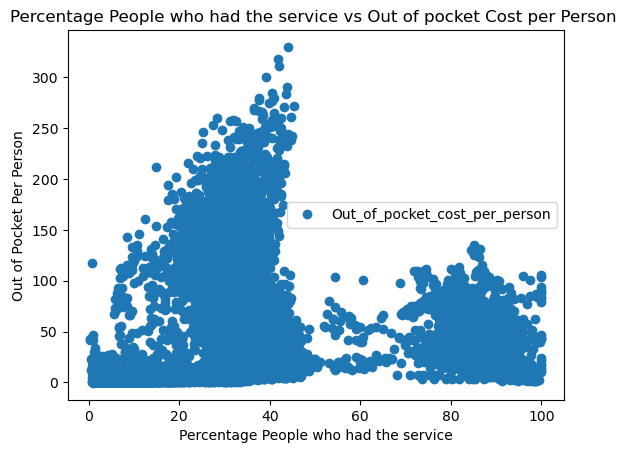

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_mbs_sa3_all_person.plot(
    x="%_People_had_service", y="Out_of_pocket_cost_per_person", style="o"
)  # The style option creates a scatterplot; without it, we only have lines.
plt.title("Percentage People who had the service vs Out of pocket Cost per Person ")
plt.xlabel("Percentage People who had the service")
plt.ylabel("Out of Pocket Per Person")
plt.show()

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_mbs_sa3_all_person["%_People_had_service"].values.reshape(-1, 1)
y = df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].values.reshape(-1, 1)

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [39]:
# Create a regression object.

regression = (
    LinearRegression()
)  # This is the regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

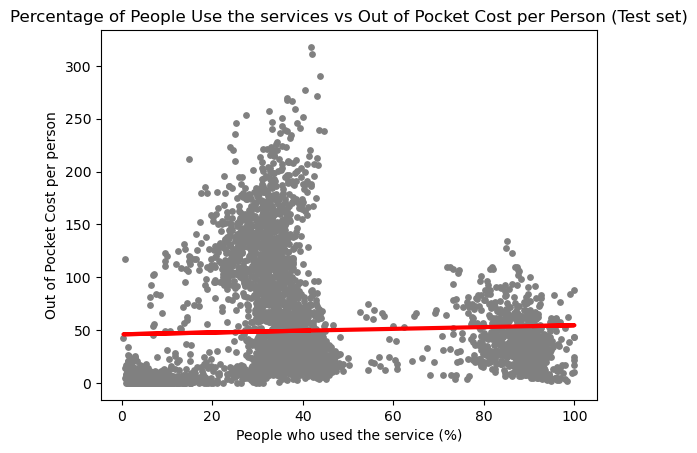

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s=15)
plot_test.plot(X_test, y_predicted, color="red", linewidth=3)
plot_test.title(
    "Percentage of People Use the services vs Out of Pocket Cost per Person (Test set)"
)
plot_test.xlabel("People who used the service (%)")
plot_test.ylabel("Out of Pocket Cost per person")
plot_test.show()

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)  # This is the mean squared error
r2 = r2_score(y_test, y_predicted)  # This is the R2 score.

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.08547984]]
Mean squared error:  2745.4248402703365
R2 score:  0.002589018596827808


In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25.520555,49.560010
1,6.754789,46.254505
2,9.218950,54.522970
3,238.772407,49.141159
4,45.767114,53.538242
5,62.433520,54.450312
6,56.519497,53.259578
7,22.474112,49.435210
8,29.763646,49.479659
9,25.618121,48.984731


### Compare how regression fits the test dataset

In [46]:
# Predict.

y_predicted_train = regression.predict(X_train)  # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.08547984]]
Mean squared error:  2648.858427792763
R2 score:  0.0019828532433153745


### Conclusion:

The model is a poor fit to predict out of pocket cost per person using percentage of people using the service in the area. There is a no correlation between these two variables.

## Hypothesis 3:

If total provider fees increases, out of pocket per person increases

<Axes: xlabel='Total_provider_fees_$', ylabel='Count'>

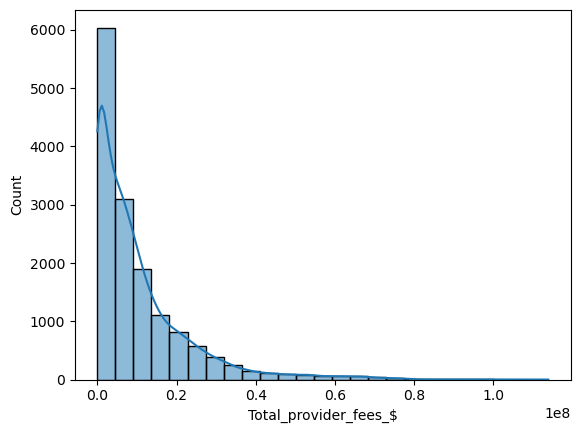

In [50]:
sns.histplot(df_mbs_sa3_all_person["Total_provider_fees_$"], kde=True, bins=25)

In [49]:
# checking on mean, median and max
print(df_mbs_sa3_all_person["Total_provider_fees_$"].mean())
print(df_mbs_sa3_all_person["Total_provider_fees_$"].median())
print(df_mbs_sa3_all_person["Total_provider_fees_$"].max())

10370747.93923284
6364409.5
113841625.0


<Axes: xlabel='Out_of_pocket_cost_per_person', ylabel='Count'>

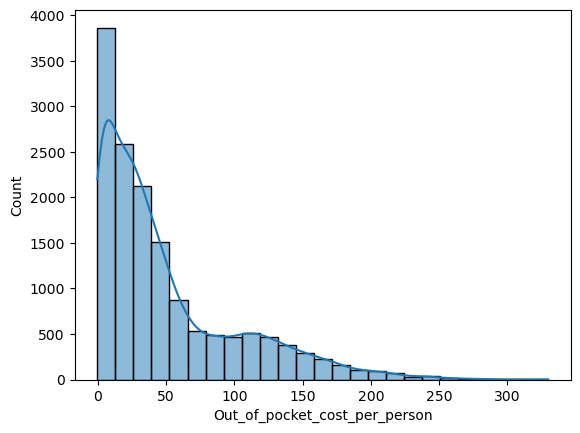

In [52]:
sns.histplot(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"], kde=True, bins=25)

In [51]:
# checking on mean, median and max on OOP per person
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].mean())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].median())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].max())

49.62518022619299
31.379432423596647
330.07523787667486


### Data Preparation for Regression Analysis

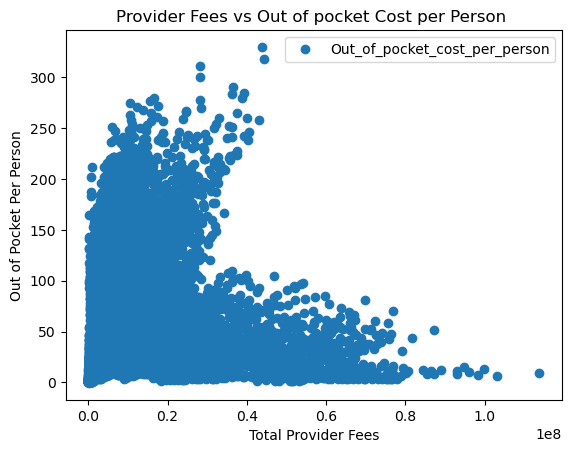

In [53]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_mbs_sa3_all_person.plot(
    x="Total_provider_fees_$", y="Out_of_pocket_cost_per_person", style="o"
)  # The style option creates a scatterplot; without it, we only have lines.
plt.title("Provider Fees vs Out of pocket Cost per Person ")
plt.xlabel("Total Provider Fees")
plt.ylabel("Out of Pocket Per Person")
plt.show()

In [54]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_mbs_sa3_all_person["Total_provider_fees_$"].values.reshape(-1, 1)
y = df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].values.reshape(-1, 1)

In [55]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [56]:
# Create a regression object.

regression = (
    LinearRegression()
)  # This is the regression object, which will be fit onto the training set.

In [57]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

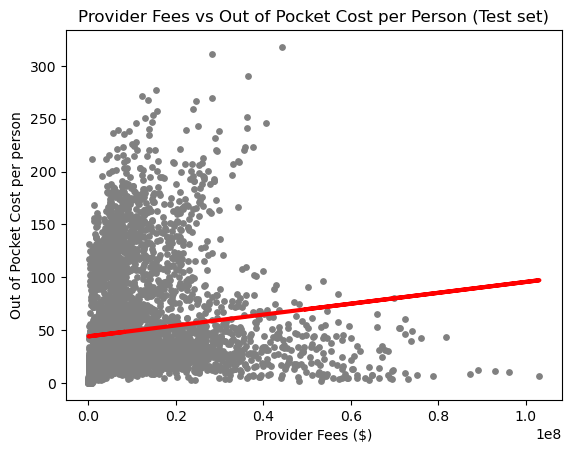

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s=15)
plot_test.plot(X_test, y_predicted, color="red", linewidth=3)
plot_test.title("Provider Fees vs Out of Pocket Cost per Person (Test set)")
plot_test.xlabel("Provider Fees ($)")
plot_test.ylabel("Out of Pocket Cost per person")
plot_test.show()

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)  # This is the mean squared error
r2 = r2_score(y_test, y_predicted)  # This is the R2 score.

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[5.14756496e-07]]
Mean squared error:  2694.402254237356
R2 score:  0.021125489478278636


In [62]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25.520555,48.165210
1,6.754789,44.097716
2,9.218950,54.388434
3,238.772407,48.828159
4,45.767114,58.450132
5,62.433520,65.791443
6,56.519497,53.927252
7,22.474112,56.929821
8,29.763646,50.658469
9,25.618121,51.790892


### Compare how regression fits the test dataset

In [63]:
# Predict.

y_predicted_train = regression.predict(X_train)  # This is predicting X_train!

In [64]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [65]:
print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[5.14756496e-07]]
Mean squared error:  2611.6465843546925
R2 score:  0.01600325441838546


### Conclusion:

The model is a poor fit to predict out of pocket cost per person using provider fees. There is a no correlation between these two variables.

## Hypothesis 4:

If medicare rebate per person increases, out of pocket per person decreases

<Axes: xlabel='MBS_per_person', ylabel='Count'>

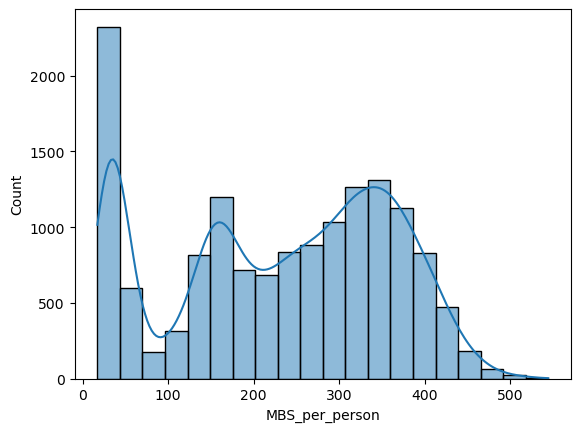

In [78]:
sns.histplot(df_mbs_sa3_all_person["MBS_per_person"], kde=True, bins=20)

In [79]:
# checking on mean, median and max
print(df_mbs_sa3_all_person["MBS_per_person"].mean())
print(df_mbs_sa3_all_person["MBS_per_person"].median())
print(df_mbs_sa3_all_person["MBS_per_person"].max())

230.37199659109615
247.8033044034388
544.4817518248175


<Axes: xlabel='Out_of_pocket_cost_per_person', ylabel='Count'>

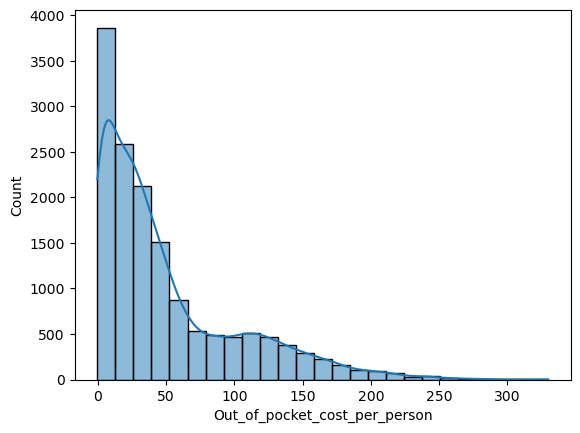

In [80]:
sns.histplot(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"], kde=True, bins=25)

In [81]:
# checking on mean, median and max on OOP per person
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].mean())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].median())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].max())

49.62518022619299
31.379432423596647
330.07523787667486


### Data Preparation for Regression Analysis

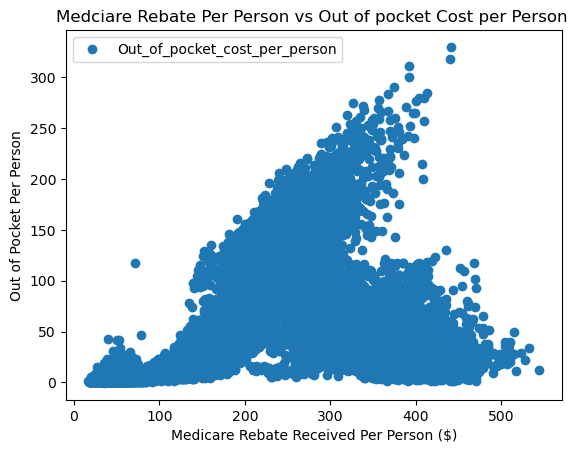

In [84]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_mbs_sa3_all_person.plot(
    x="MBS_per_person", y="Out_of_pocket_cost_per_person", style="o"
)  # The style option creates a scatterplot; without it, we only have lines.
plt.title("Medciare Rebate Per Person vs Out of pocket Cost per Person ")
plt.xlabel("Medicare Rebate Received Per Person ($)")
plt.ylabel("Out of Pocket Per Person")
plt.show()

In [85]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_mbs_sa3_all_person["MBS_per_person"].values.reshape(-1, 1)
y = df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].values.reshape(-1, 1)

In [86]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [87]:
# Create a regression object.

regression = (
    LinearRegression()
)  # This is the regression object, which will be fit onto the training set.

In [88]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

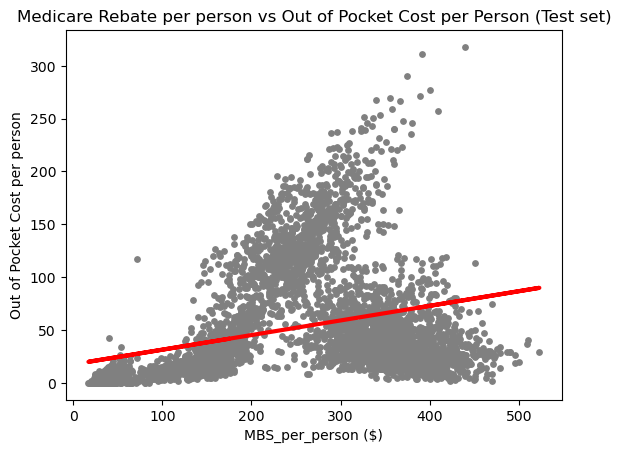

In [90]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s=15)
plot_test.plot(X_test, y_predicted, color="red", linewidth=3)
plot_test.title(
    "Medicare Rebate per person vs Out of Pocket Cost per Person (Test set)"
)
plot_test.xlabel("MBS_per_person ($)")
plot_test.ylabel("Out of Pocket Cost per person")
plot_test.show()

In [91]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)  # This is the mean squared error
r2 = r2_score(y_test, y_predicted)  # This is the R2 score.

In [92]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.13844147]]
Mean squared error:  2409.9863899586217
R2 score:  0.12445357996388462


In [93]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25.520555,41.534940
1,6.754789,22.486620
2,9.218950,78.361130
3,238.772407,60.706476
4,45.767114,63.996497
5,62.433520,72.478497
6,56.519497,62.829828
7,22.474112,72.275709
8,29.763646,66.545140
9,25.618121,72.285074


### Compare how regression fits the test dataset

In [94]:
# Predict.

y_predicted_train = regression.predict(X_train)  # This is predicting X_train!

In [95]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [96]:
print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.13844147]]
Mean squared error:  2337.609347031587
R2 score:  0.11925296336043212


### Conclusion:

The model is a poor fit to predict out of pocket cost per person using medicare rebate received per person. There is minimum correlation

## Hypothesis 5:

If number of services increases, out of pocket per person decreases

In [114]:
# checking on mean, median and max
print(df_mbs_sa3_all_person["No_of_service_per_person"].mean())
print(df_mbs_sa3_all_person["No_of_service_per_person"].median())
print(df_mbs_sa3_all_person["No_of_service_per_person"].max())

3.379723803247172
2.6375843312539313
10.533532461677186


<Axes: xlabel='Out_of_pocket_cost_per_person', ylabel='Count'>

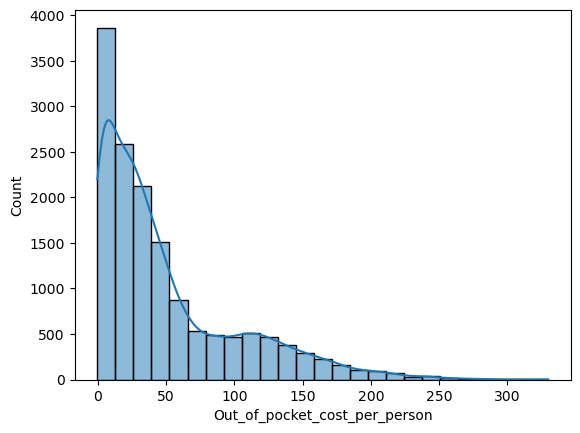

In [98]:
sns.histplot(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"], kde=True, bins=25)

In [ ]:
# checking on mean, median and max on OOP per person
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].mean())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].median())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].max())

49.62518022619299
31.379432423596647
330.07523787667486


### Data Preparation for Regression Analysis

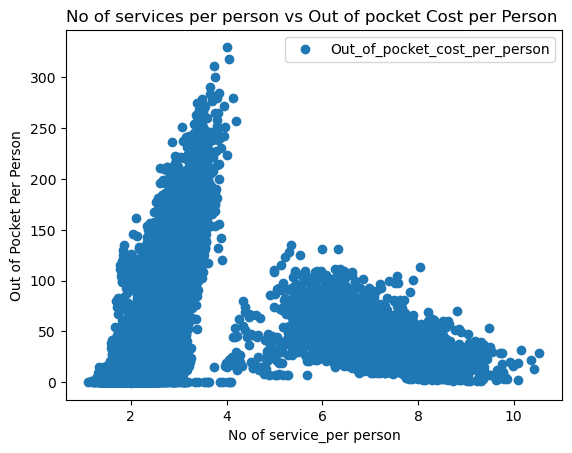

In [100]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_mbs_sa3_all_person.plot(
    x="No_of_service_per_person", y="Out_of_pocket_cost_per_person", style="o"
)  # The style option creates a scatterplot; without it, we only have lines.
plt.title("No of services per person vs Out of pocket Cost per Person ")
plt.xlabel("No of service_per person")
plt.ylabel("Out of Pocket Per Person")
plt.show()

In [101]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_mbs_sa3_all_person["No_of_service_per_person"].values.reshape(-1, 1)
y = df_mbs_sa3_all_person["Out_of_pocket_cost_per_person"].values.reshape(-1, 1)

In [102]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [103]:
# Create a regression object.

regression = (
    LinearRegression()
)  # This is the regression object, which will be fit onto the training set.

In [104]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [105]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

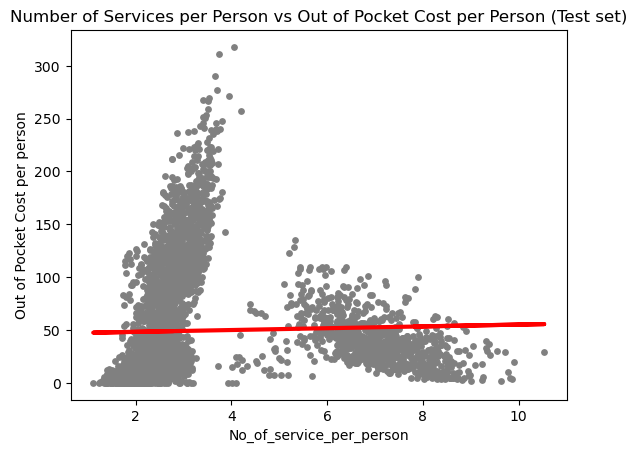

In [107]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s=15)
plot_test.plot(X_test, y_predicted, color="red", linewidth=3)
plot_test.title(
    "Number of Services per Person vs Out of Pocket Cost per Person (Test set)"
)
plot_test.xlabel("No_of_service_per_person")
plot_test.ylabel("Out of Pocket Cost per person")
plot_test.show()

In [108]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)  # This is the mean squared error
r2 = r2_score(y_test, y_predicted)  # This is the R2 score.

In [109]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.85962409]]
Mean squared error:  2748.9896456386273
R2 score:  0.0012939272256329293


In [110]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25.520555,48.851763
1,6.754789,47.846772
2,9.218950,53.981799
3,238.772407,49.252266
4,45.767114,52.172796
5,62.433520,53.616960
6,56.519497,51.821453
7,22.474112,48.919082
8,29.763646,48.717123
9,25.618121,48.772173


### Compare how regression fits the test dataset

In [111]:
# Predict.

y_predicted_train = regression.predict(X_train)  # This is predicting X_train!

In [112]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [113]:
print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[0.85962409]]
Mean squared error:  2651.3715561421823
R2 score:  0.0010359754644184704


### Conclusion:

The model is a poor fit to predict out of pocket cost per person using number of service used per person. There is a no correlation between these two variables.

## Hypothesis 6:

If number of services per person increases, out of pocket per service decreases

In [ ]:
# checking on mean, median and max
print(df_mbs_sa3_all_person["No_of_service_per_person"].mean())
print(df_mbs_sa3_all_person["No_of_service_per_person"].median())
print(df_mbs_sa3_all_person["No_of_service_per_person"].max())

3.379723803247172
2.6375843312539313
10.533532461677186


<Axes: xlabel='Out_of_pocket_cost_per_service', ylabel='Count'>

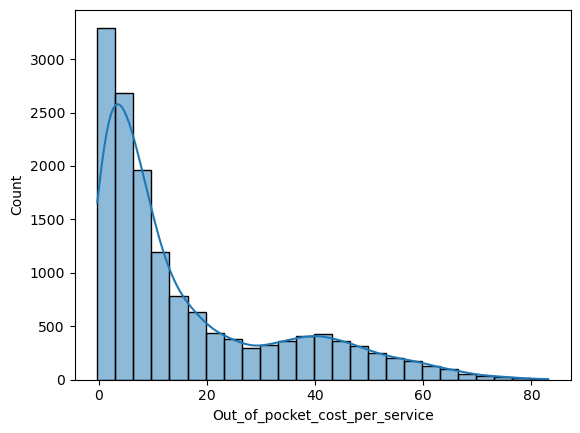

In [115]:
sns.histplot(df_mbs_sa3_all_person["Out_of_pocket_cost_per_service"], kde=True, bins=25)

In [116]:
# checking on mean, median and max on OOP per person
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_service"].mean())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_service"].median())
print(df_mbs_sa3_all_person["Out_of_pocket_cost_per_service"].max())

16.26090630201565
8.74714169385581
83.10156963375212


### Data Preparation for Regression Analysis

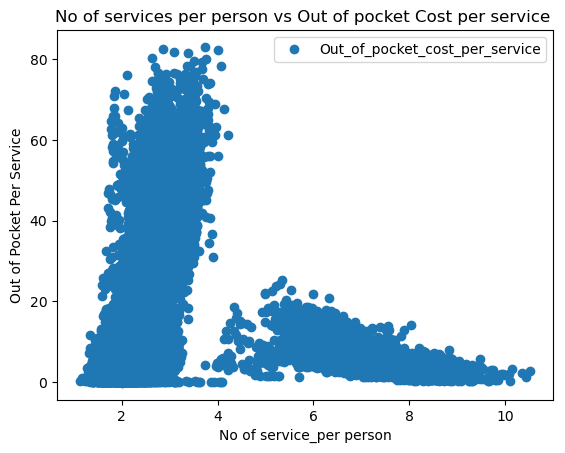

In [120]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_mbs_sa3_all_person.plot(
    x="No_of_service_per_person", y="Out_of_pocket_cost_per_service", style="o"
)  # The style option creates a scatterplot; without it, we only have lines.
plt.title("No of services per person vs Out of pocket Cost per service ")
plt.xlabel("No of service_per person")
plt.ylabel("Out of Pocket Per Service")
plt.show()

In [127]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_mbs_sa3_all_person["No_of_service_per_person"].values.reshape(-1, 1)
y = df_mbs_sa3_all_person["Out_of_pocket_cost_per_service"].values.reshape(-1, 1)

In [128]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [129]:
# Create a regression object.

regression = (
    LinearRegression()
)  # This is the regression object, which will be fit onto the training set.

In [130]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [131]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

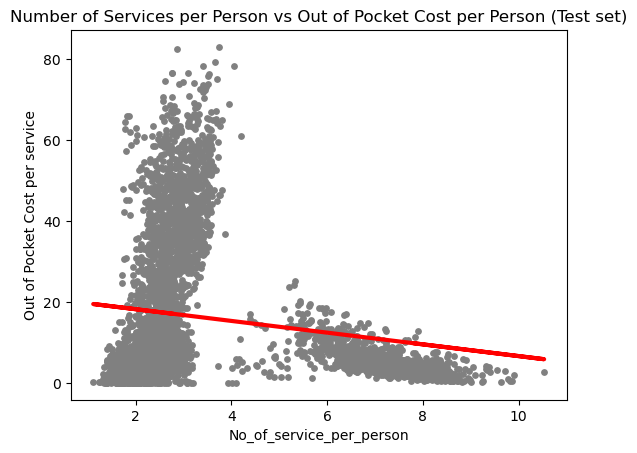

In [132]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s=15)
plot_test.plot(X_test, y_predicted, color="red", linewidth=3)
plot_test.title(
    "Number of Services per Person vs Out of Pocket Cost per Person (Test set)"
)
plot_test.xlabel("No_of_service_per_person")
plot_test.ylabel("Out of Pocket Cost per service")
plot_test.show()

In [133]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)  # This is the mean squared error
r2 = r2_score(y_test, y_predicted)  # This is the R2 score.

In [134]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[-1.4498166]]
Mean squared error:  300.55998099628465
R2 score:  0.023609382525870082


In [135]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.271978,17.110911
1,4.266183,18.805900
2,1.057194,8.458745
3,74.191089,16.435436
4,6.917857,11.509756
5,7.525930,9.074072
6,9.105655,12.102321
7,7.939276,16.997374
8,11.466023,17.337991
9,9.631408,17.245146


### Compare how regression fits the test dataset

In [136]:
# Predict.

y_predicted_train = regression.predict(X_train)  # This is predicting X_train!

In [137]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [138]:
print("Slope:", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[-1.4498166]]
Mean squared error:  291.8019661109804
R2 score:  0.02610379538374441


### Conclusion:

The model is a poor fit to predict out of pocket cost per servic using number of service used per person used. There is a no correlation between these two variables.